![SPOTIFY](image.png) 

# Predicting Hits on Spotify using Machine Learning - MAIN

#### Authors: Adithya Bhonsley, Prayaag Gupta, Benjamin Wang, Dinesh Polisetty 

In this era of digital music, understanding the dynamics of song popularity is more intriguing than ever! With millions of songs available at our fingertips, we were curious to leverage machine learning to launch a data-driven exploration into what makes songs hits. For our experiments, we'll take a closer look into Spotify, one of the largest music streaming platforms in the world, and aim to predict song popularity through a variety of different modeling and analysis techniques covered in class. Below is the methodology we follow throughout this notebook for our experiments:

* **Fetch**: Collect input data from various sources and synthesize
* **Modify**: Run data pre-processing, cleaning, and feature selection/engineering
* **Analyze**: Examine data using varying models, optimize through hyperparamater tuning, and compare
* **Discuss**: Present results and visualizations to draw meaningful insights

_For this investigation, our primary goal was to predict what features are most important to determine how many streams a song gets. Specifically, for an aspriring artist, this could be crucial. Do songs released in the summertime get more streams? Is being placed on Apple Top Charts more important than a competitor? When making new music, should they focus on features such as danceability and tempo? These are the types of questions we want to answer in this project._ We carried out regression and classification algorithms to help answer these questions.

## Defining a Library

First, lets import all relevant libraries needed for data analysis, modeling, and visualizations.

In [413]:
# File handling
import json 

# Data handling and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Spotify API usage
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Setup and Results
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text

# Models
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor,LazyClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'lazypredict'

## Fetching Data

For our experiments, we'll use a Kaggle dataset sourced by developer Nidula Elgiryewithana, a comprehensive list of 2023 songs with an extensive insights on musical attributes, popularity, relevant metrics, and more. This dataset can be found here: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023. First, we read and load the data from its original CSV format.

In [414]:
data = pd.read_csv('data/spotify-2023.csv', encoding='latin-1')
data.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


## Data Cleaning

Given the above data, now let's take a closer look the features provided, their data-types, and other attributes which may need to adjusted or cleaned prior to experimentation.

In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Above we see various attributes regarding a song's factual attributes (name, artist, release time, charts ranking, etc) as well as some more subjective attributes like musical ratings (danceability, energy, etc). Here's a more in-depth breakdown on the meaning behind these musical features, scored between 0 and 100:

* **danceability_%**: Measure of how suitiable a song is for dancing.
* **valence_%**: Measure of how upbeat a song is (low for sad/negative, high for positive/upbeat)	
* **energy_%**: Measure of how energetic a song is.
* **acousticness_%**: Measure of acoustic sound in the song	
* **instrumentalness_%**: Measure of instrumental content in the song	
* **liveness_%**: Measure of live performance elements in the song
* **speechiness_%**: Measure of spoken words in the song.

More information on any other features can be found here: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

Let's inspect the dataset for any missing values which could potentially skew results.

In [416]:
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

From the table above, we find 50 occurrences of missing <code>in_shazam_charts</code> values and 95 occurences of missing <code>key</code> values:

* The missing Shazam charts records are likely popular songs that did not chart on Shazam. We can mark these values with a placeholder of -1 since it's are outside the range of possible values (positive integers).
* The entries with missing key values, denoting the song's key, could likely not be established. These key values are assigned using pitch class labels (0-12), more info: <href>https://en.wikipedia.org/wiki/Pitch_class</href>. To address these missing values, we can fill with -1 as well since that is also outside the range of possible values.

In both cases, we resolve missing values using a placeholder value, clearly indicating to our future model that the data is missing or not applicable.

In [417]:
# Fill missing values with -1 in shazam charts column
data['in_shazam_charts'] = data['in_shazam_charts'].fillna(-1)

# Fill missing values with -1 in key column
data['key'] = data['key'].fillna(-1)

# Check for missing again
data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

#### Handling Improper Types
Now let's check to see if any of our attributes are incorrectly typed in the data and require modifcation.

In [418]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Above, we see that <code>streams</code> is an object type, but instead should be numeric to represent a quantity. Tthe same applies with columns <code>in_deezer_playlists</code> and <code>in_shazam_charts</code>.

In [419]:
# Convert streams to numeric values
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Drop any records with unlisted streams
data = data.dropna(subset=['streams'])

# Fill missing values in the deezer and shazam playlist feature with the median value
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')
data['in_shazam_charts'].fillna(data['in_shazam_charts'].median(), inplace=True)

data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data['in_deezer_playlists'].fillna(data['in_deezer_playlists'].median(), inplace=True)

# Convert deezer playlist rankings to numeric values
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')

# Convert shazam chart rankings to numeric values
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')

Also, all of our song property features are represented as whole integers but instead should be proportions. Let's adjust for that.

In [420]:
song_property_cols = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Convert to proportion
for col in song_property_cols:
    data[col] = data[col] / 100.

#### Handling Categorical Variables

Next, we'll have to handle our categorical features, <code>key</code> and <code>mode</code>. For <code>key</code>, let's use a label encoder to map the 12 distinct categories to integer representations since there is a natural ordering. For <code>key</code>, we can utilize one-hot encoding since there are only two classes (Major and Minor) so dimensionality doesn't increase significantly. 

In [421]:
# Generate one-hot encoded columns for mode (Major/Minor) feature and add to dataset
mode_onehot = pd.get_dummies(data['mode'],prefix='mode')
data = pd.concat([data, mode_onehot], axis=1)
data = data.drop('mode', axis=1)

# Generate integer representations for categories for key
data['key'] = LabelEncoder().fit_transform(data['key'].astype(str))

#### Removing Likely Unhelpful Features
Unique identifiers like song name likely do not have impact on a song's popularity. Additionally, we chose to drop artist name simply due to the significant addition to dimensionality it would pose if we opted for one-hot encoding.

In [422]:
# Preserve copy of original before drop to analyze popular songs
original = data.copy(deep=False)

columns_to_drop = ['track_name', 'artist(s)_name']
data = data.drop(columns=columns_to_drop)
data.isna().sum()

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
mode_Major              0
mode_Minor              0
dtype: int64

### Feature Engineering

The first thing we want to do is create some features that are useful in predicting whether a song becomes extremely popular or not. 
* <code>Seasons</code> - This can be relevant as some seasons are associated with moods, themes, activities, cultures, etc.
* <code>Genre</code> - This can be relevant as some genres might resonate more with the average person
* <code>Artist Popularity</code> - This can be relevant as a song might gain a lot of traction based on an artist's popularity and the marketing they use for the song


In [423]:
data.dtypes

artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                       int64
danceability_%          float64
valence_%               float64
energy_%                float64
acousticness_%          float64
instrumentalness_%      float64
liveness_%              float64
speechiness_%           float64
mode_Major                uint8
mode_Minor                uint8
dtype: object

In [424]:
#Creating a seasons column and removing the released_month, released_day, and released_year columns
def month_to_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

data['season'] = data['released_month'].apply(month_to_season)
columns_to_drop = ['released_year', 'released_month', 'released_day']
data = data.drop(columns=columns_to_drop)

Now that we have created the seasons column, we can go ahead and remove the columns such as <code>released_year</code>, <code>released_year</code>, and <code>released_year</code>. Having the specific day/month reaches a level of granularity that we do not want. Any statistically signficant results that we would see here would also be likely due to variance. However, a more coarse metric, such as season, could be much more applicable here. We will one-hot encode these values later.

##### Spotify API

As discussed above, we next want to add the genre and artist popularity values for each of the songs. However, the dataset that we are using does not have these values available to us. Thus, we need to use the Spotify API to add these values to our data. The following code displays how we were able to make requests to the Spotify API and fill in these values. Since these calls are time-intensive and can be rate-limited at times, we do not want to make this call every time this cell is run. Thus, we have run this separately and have stored all the data in the dataframe on this next cell.

In [425]:
# Code we used to generate the genre and number of followers data

'''
#Getting the genre of a song and popularity of an artist with the spotify API
def read_spotify_credentials(file_path):
    credentials = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            credentials[key] = value
    return credentials

credentials_file_path = 'spotify_credentials.txt'
spotify_credentials = read_spotify_credentials(credentials_file_path)
client_credentials_manager = SpotifyClientCredentials(
    client_id=spotify_credentials['client_id'],
    client_secret=spotify_credentials['client_secret']
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=5)

def get_top_genre(artist_name):
    results = sp.search(q='artist:' + artist_name, type='artist')

    if len(results['artists']['items']) > 0:
        artist_id = results['artists']['items'][0]['id']
        if len(sp.artist(artist_id)['genres']) > 0:
            return sp.artist(artist_id)['genres'][0]
        else:
            return None
    else:
        return None

def get_num_followers(artist_name):
    results = sp.search(q='artist:' + artist_name, type='artist')

    if len(results['artists']['items']) > 0:
        artist_id = results['artists']['items'][0]['id']
        num_followers = results['artists']['items'][0]['followers']['total']
        return num_followers
    else:
        return None


''';

In [426]:
data = pd.read_csv('final_dataset.csv')
data.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor,season,genre,num_followers
0,2.0,553.0,147.0,141381703.0,43.0,263.0,45.0,10.0,826.0,125.0,...,0.83,0.31,0.00,0.08,0.04,1.0,0.0,Summer,pop,12483564.0
1,1.0,1474.0,48.0,133716286.0,48.0,126.0,58.0,14.0,382.0,92.0,...,0.74,0.07,0.00,0.10,0.04,1.0,0.0,Spring,reggaeton,13202622.0
2,1.0,1397.0,113.0,140003974.0,94.0,207.0,91.0,14.0,949.0,138.0,...,0.53,0.17,0.00,0.31,0.06,1.0,0.0,Summer,pop,29886574.0
3,1.0,7858.0,100.0,800840817.0,116.0,207.0,125.0,12.0,548.0,170.0,...,0.72,0.11,0.00,0.11,0.15,1.0,0.0,Summer,pop,92584265.0
4,1.0,3133.0,50.0,303236322.0,84.0,133.0,87.0,15.0,425.0,144.0,...,0.80,0.14,0.63,0.11,0.06,0.0,1.0,Spring,reggaeton,76637811.0


There is a NaN value at the last record, so we can go ahead and simply remove that.

In [427]:
data.drop(952, inplace=True)
data.tail()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor,season,genre,num_followers
947,1.0,953.0,0.0,91473363.0,61.0,13.0,37.0,1.0,0.0,144.0,...,0.39,0.57,0.00,0.08,0.03,1.0,0.0,Fall,pop,92584265.0
948,1.0,1180.0,0.0,121871870.0,4.0,0.0,8.0,0.0,0.0,166.0,...,0.24,0.83,0.01,0.12,0.06,1.0,0.0,Fall,pop,46495435.0
949,2.0,573.0,0.0,73513683.0,2.0,0.0,7.0,0.0,0.0,92.0,...,0.67,0.04,0.00,0.08,0.06,1.0,0.0,Fall,pop,92584265.0
950,3.0,1320.0,0.0,133895612.0,29.0,26.0,17.0,0.0,0.0,97.0,...,0.77,0.08,0.00,0.12,0.05,1.0,0.0,Fall,pop,12483564.0
951,1.0,782.0,2.0,96007391.0,27.0,18.0,32.0,1.0,0.0,90.0,...,0.67,0.15,0.00,0.11,0.05,0.0,1.0,Fall,pop,12483564.0


As we can see below, we now have the <code>genre</code> and <code>num_followers</code> for each of the records. However, let's see how many unique values there are for the genre column.

In [428]:
num_genres = data['genre'].nunique()

print(f"Number of unique values in 'genre' column: {num_genres}")

Number of unique values in 'genre' column: 157


If we were to one-hot encode these values, we would be adding 157 features to the dataset. This would signficantly increase the dimensionality of the dataset and potentially introduce the curse of dimensionality to our data. This is obviously not something that we want, so let's go ahead and drop the genre column from the data. Another reason why we feel comfortable doing this is that it is not crucial for the purpose of our project. Many artists already know what type of music/genre they want to make music in. Thus, we feel that it is okay to delete this column.

In [429]:
data = data.drop('genre', axis=1)
data.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor,season,num_followers
0,2.0,553.0,147.0,141381703.0,43.0,263.0,45.0,10.0,826.0,125.0,...,0.89,0.83,0.31,0.00,0.08,0.04,1.0,0.0,Summer,12483564.0
1,1.0,1474.0,48.0,133716286.0,48.0,126.0,58.0,14.0,382.0,92.0,...,0.61,0.74,0.07,0.00,0.10,0.04,1.0,0.0,Spring,13202622.0
2,1.0,1397.0,113.0,140003974.0,94.0,207.0,91.0,14.0,949.0,138.0,...,0.32,0.53,0.17,0.00,0.31,0.06,1.0,0.0,Summer,29886574.0
3,1.0,7858.0,100.0,800840817.0,116.0,207.0,125.0,12.0,548.0,170.0,...,0.58,0.72,0.11,0.00,0.11,0.15,1.0,0.0,Summer,92584265.0
4,1.0,3133.0,50.0,303236322.0,84.0,133.0,87.0,15.0,425.0,144.0,...,0.23,0.80,0.14,0.63,0.11,0.06,0.0,1.0,Spring,76637811.0


The last step we need to take is one-hot encode the <code>seasons</code> column. Currently, we cannot carry out an analysis with this categorical variable, so we need to add these 4 dimensions and then remove the current <code>seasons</code> column.

In [430]:
data_encoded = pd.get_dummies(data['season'], prefix='season')
data = pd.concat([data, data_encoded], axis=1)
data = data.drop('season', axis=1)
data.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,...,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor,num_followers,season_Fall,season_Spring,season_Summer,season_Winter
0,2.0,553.0,147.0,141381703.0,43.0,263.0,45.0,10.0,826.0,125.0,...,0.00,0.08,0.04,1.0,0.0,12483564.0,0,0,1,0
1,1.0,1474.0,48.0,133716286.0,48.0,126.0,58.0,14.0,382.0,92.0,...,0.00,0.10,0.04,1.0,0.0,13202622.0,0,1,0,0
2,1.0,1397.0,113.0,140003974.0,94.0,207.0,91.0,14.0,949.0,138.0,...,0.00,0.31,0.06,1.0,0.0,29886574.0,0,0,1,0
3,1.0,7858.0,100.0,800840817.0,116.0,207.0,125.0,12.0,548.0,170.0,...,0.00,0.11,0.15,1.0,0.0,92584265.0,0,0,1,0
4,1.0,3133.0,50.0,303236322.0,84.0,133.0,87.0,15.0,425.0,144.0,...,0.63,0.11,0.06,0.0,1.0,76637811.0,0,1,0,0


We now have our final dataset! Let's carry out some data analysis before moving into our machine learning models.

### Data Analysis

#### Descriptive Statistics

In [431]:
data.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,...,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor,num_followers,season_Fall,season_Spring,season_Summer,season_Winter
count,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,...,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000
mean,1.556723,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,103.679622,2.669118,48.128151,122.553571,...,0.015830,0.182143,0.101387,0.576681,0.423319,2.106469e+07,0.219538,0.294118,0.203782,0.282563
std,0.893331,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,172.518852,6.038152,123.312357,28.069601,...,0.084141,0.137184,0.099154,0.494345,0.494345,2.537547e+07,0.414151,0.455885,0.403020,0.450482
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,-1.000000,65.000000,...,0.000000,0.030000,0.020000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,99.750000,...,0.000000,0.100000,0.040000,0.000000,0.000000,7.652211e+06,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,36.000000,0.000000,2.000000,121.000000,...,0.000000,0.120000,0.060000,1.000000,0.000000,1.248356e+07,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,100.000000,2.000000,32.000000,140.250000,...,0.000000,0.240000,0.110000,1.000000,1.000000,1.698998e+07,0.000000,1.000000,0.000000,1.000000
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,...,0.910000,0.970000,0.640000,1.000000,1.000000,1.153782e+08,1.000000,1.000000,1.000000,1.000000


From the above statistics, we find a couple of interesting observations:
* Streams range anywhere betweem **2,7623** to **3,703,895,000**. The mean # of streams is **514,137,400** with a standard deviation of **566,856,900**, indicating a large degree of variance between song popularity.
* A number of songs in the dataset did not even chart but yet were able to achieve high streams.
* Number of followers also varies widely, between **1** and **115,407,500**, which suggests the songs in our dataset come form artists both popular and unpopular.
* We also see good variation in song properties like danceability, valence, energy, and more, ranging from **~0%** to **98%**.

#### Data Visualizations

Now, let's visualize these individual attributes to determine potentially important trends, outliers, and characteristics. First, let's take a look at the **top 20** songs on Spotify in 2023:

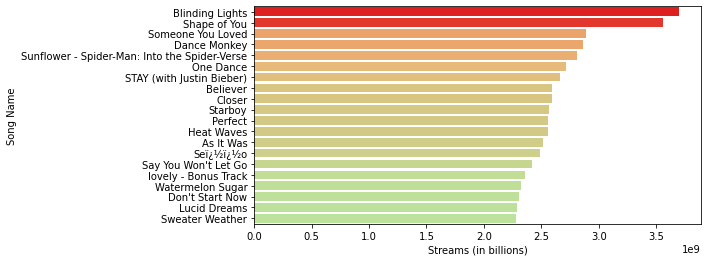

In [432]:
# Sort and fetch top 10 songs
data_sorted = original.sort_values(by='streams', ascending=False)
top_20 = data_sorted.head(20)

norm = plt.Normalize(data['streams'].min(), data['streams'].max())
colors = plt.cm.rainbow(norm(top_20['streams'])) 

# Display results in bar chart
plt.subplots(1,1, figsize=(8,4))
sns.barplot(data=top_20, x='streams', y='track_name', palette=list(colors), hue='track_name')
plt.xlabel('Streams (in billions)')
plt.ylabel('Song Name')
plt.show()

Now, let's inspect (a) distribution of attribute values and (b) the relationships between all the attributes in our dataset to our prediction variable (# of streams) through several visualizations:

In [433]:
data.dtypes

artist_count            float64
in_spotify_playlists    float64
in_spotify_charts       float64
streams                 float64
in_apple_playlists      float64
in_apple_charts         float64
in_deezer_playlists     float64
in_deezer_charts        float64
in_shazam_charts        float64
bpm                     float64
key                     float64
danceability_%          float64
valence_%               float64
energy_%                float64
acousticness_%          float64
instrumentalness_%      float64
liveness_%              float64
speechiness_%           float64
mode_Major              float64
mode_Minor              float64
num_followers           float64
season_Fall               uint8
season_Spring             uint8
season_Summer             uint8
season_Winter             uint8
dtype: object

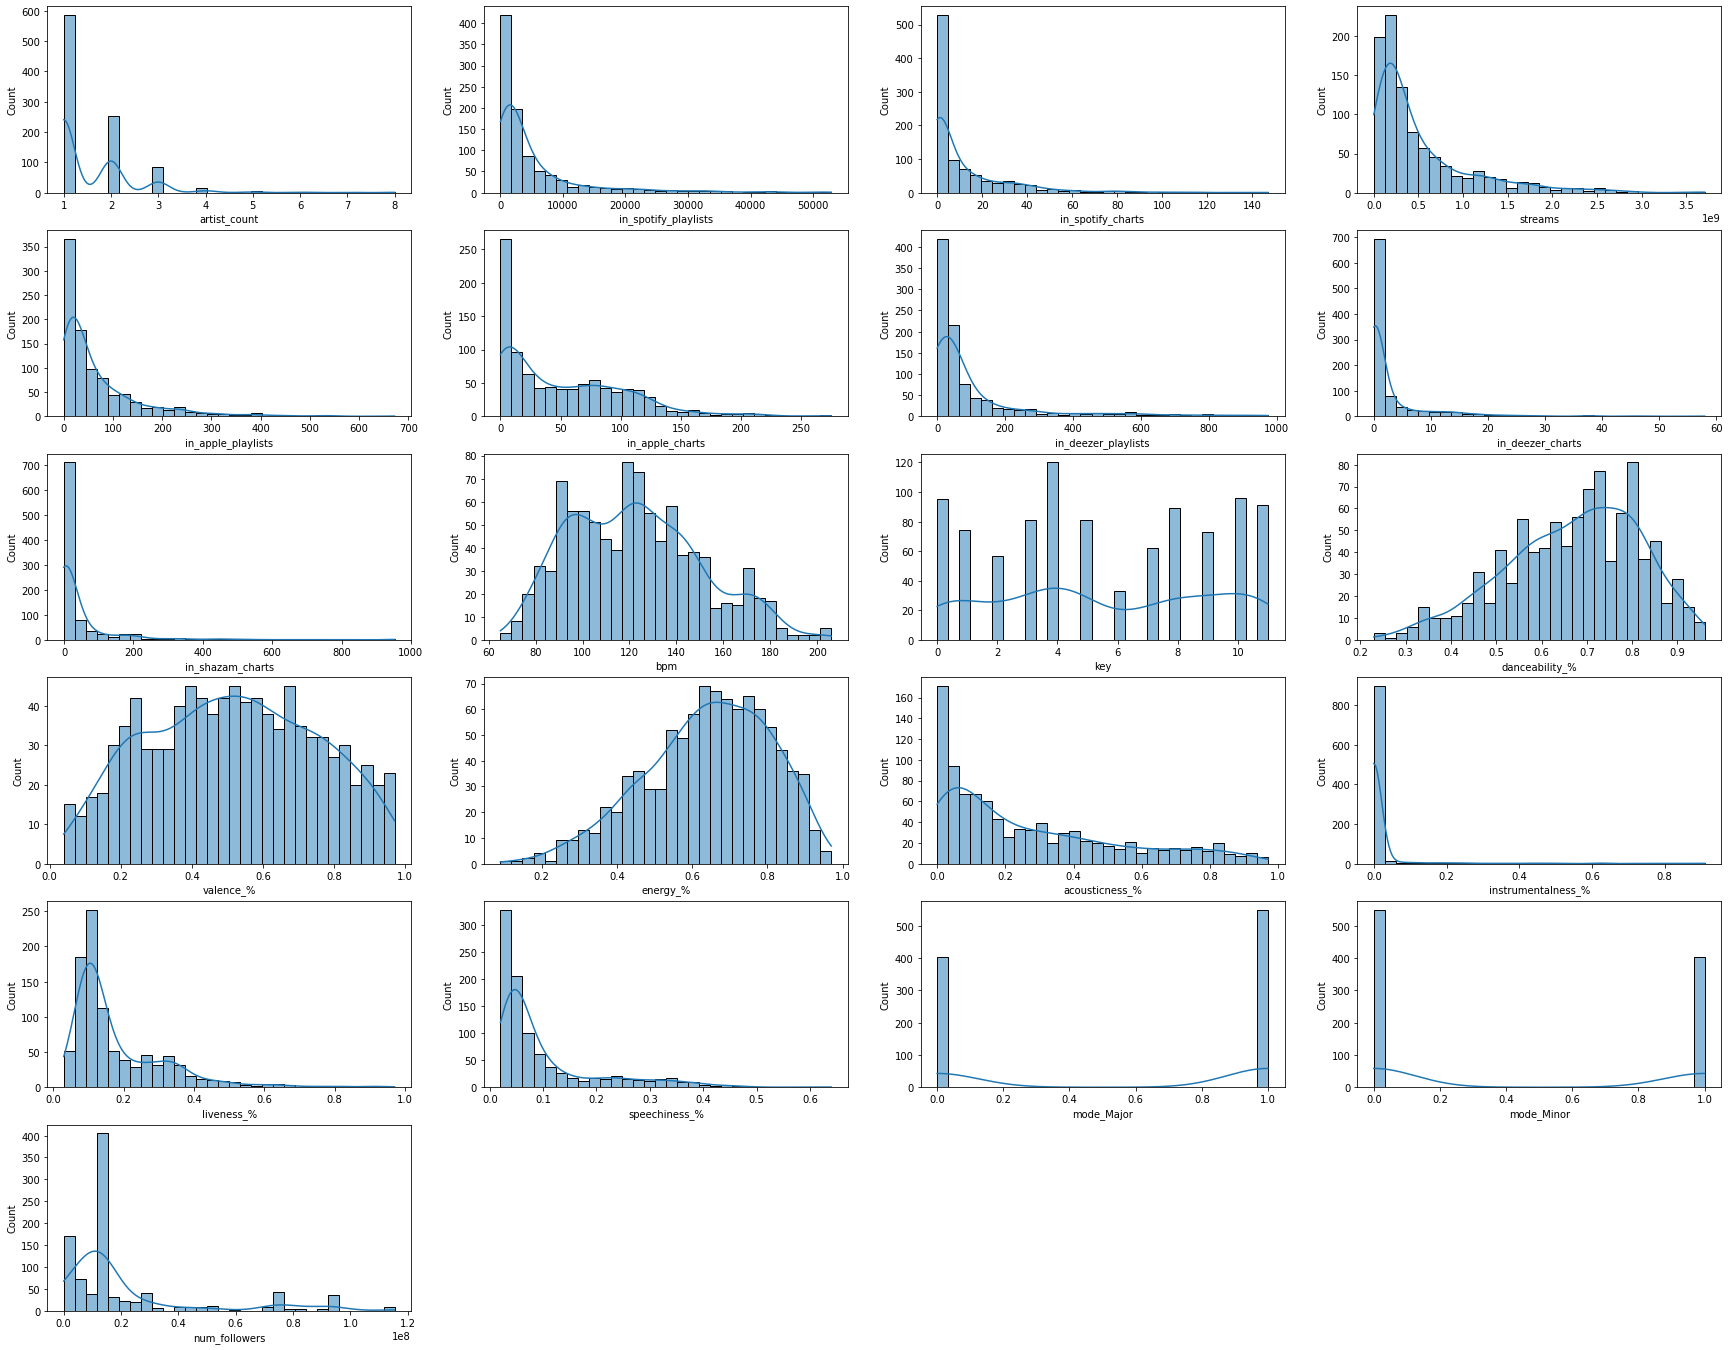

In [434]:
plt.figure(figsize=(30,24))

for i, col in enumerate(data.columns):
    if not col.startswith("season"):
        plt.subplot(6, 4, i + 1)
        sns.histplot(data=data, x=col, bins=30, kde=True)
        plt.tight_layout
    
plt.show()

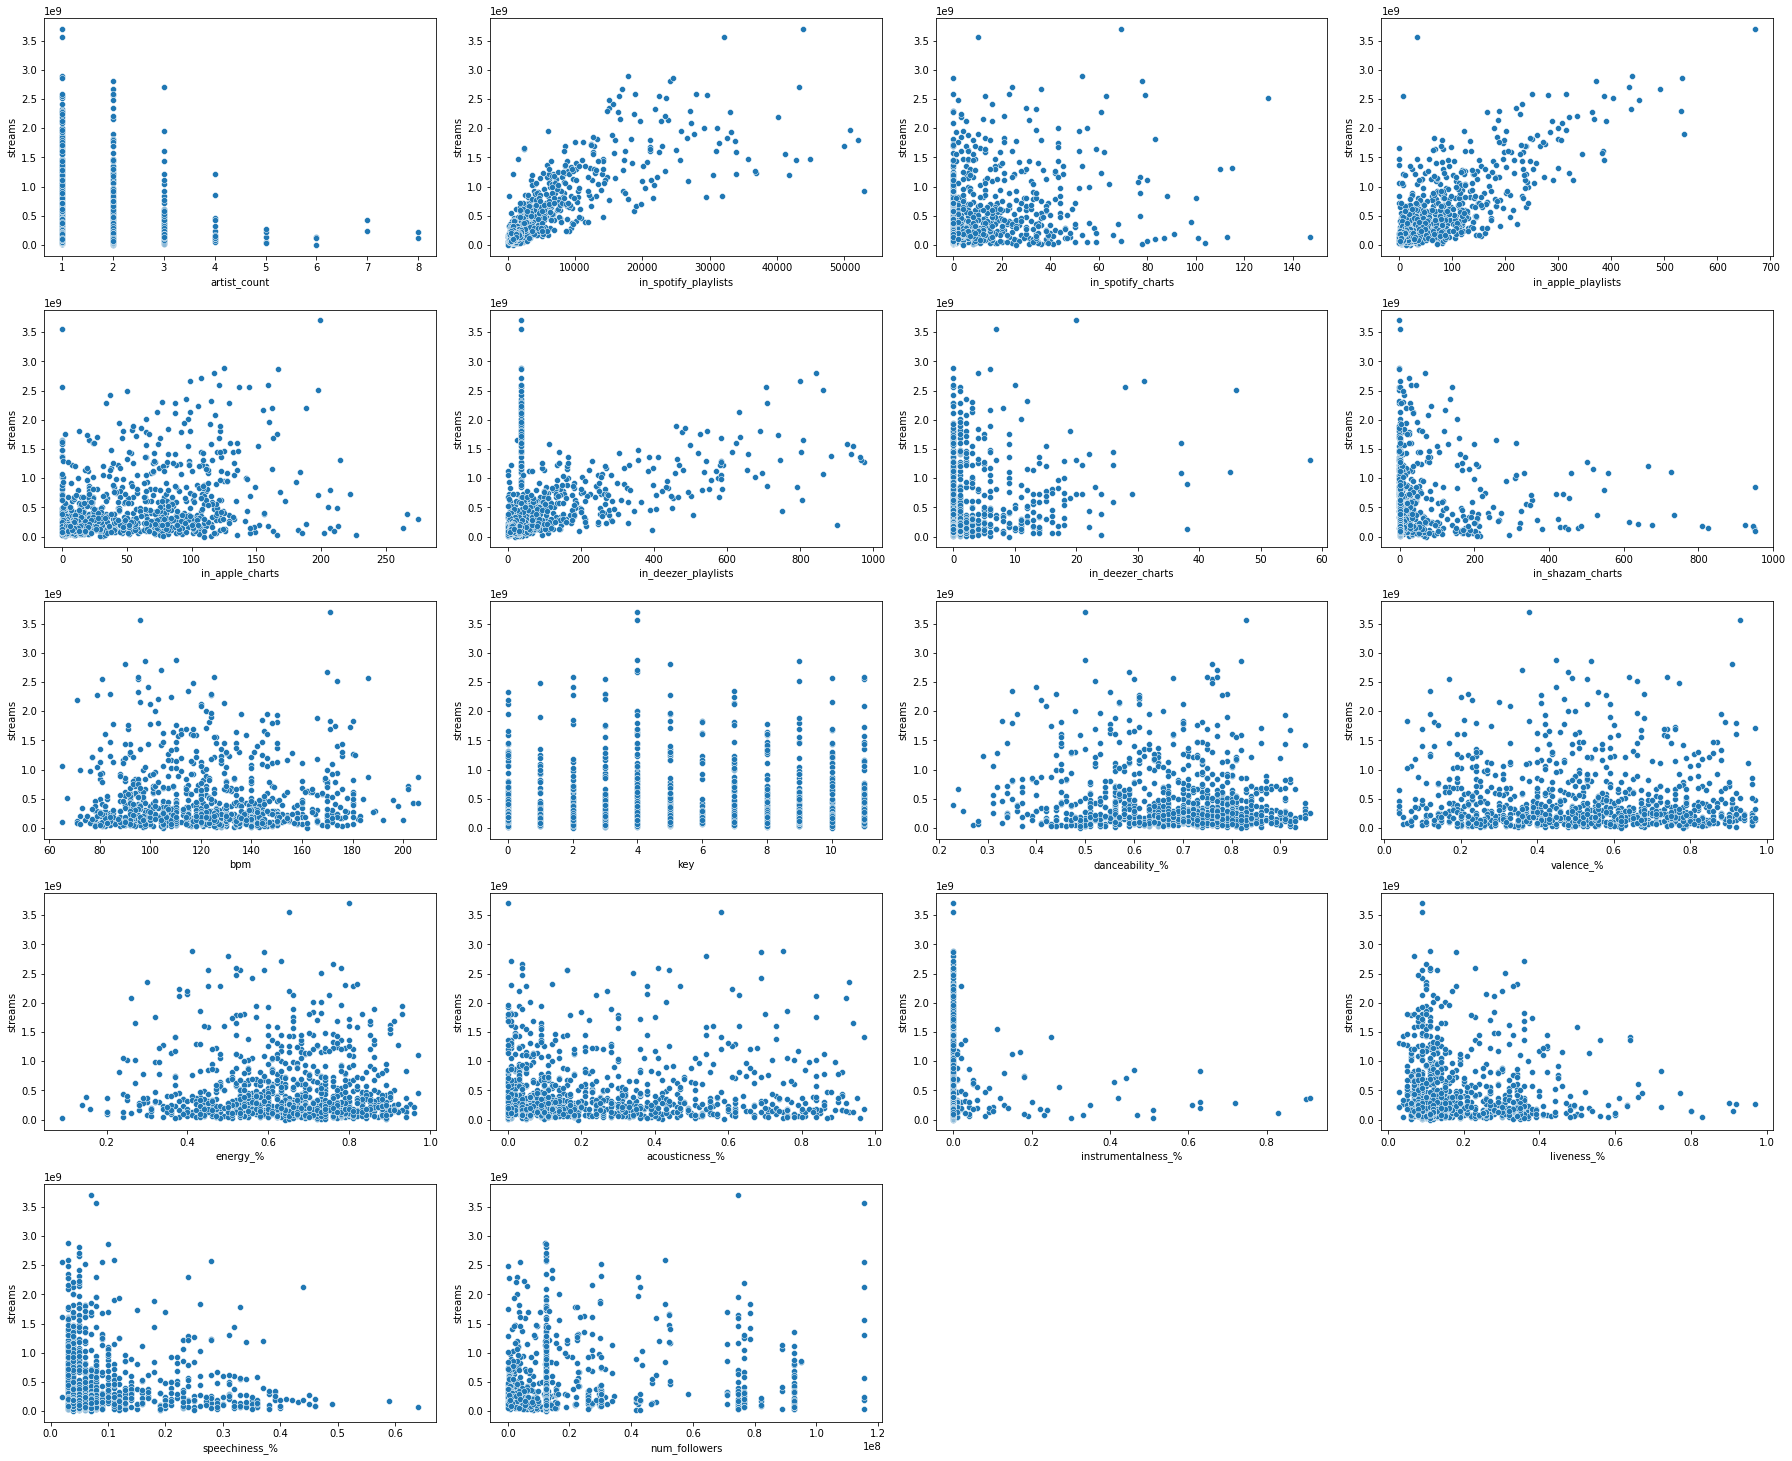

In [435]:
plt.figure(figsize=(25,24))

exclude_cols = ["track_name", "artist(s)_name", "streams", "mode", "mode_Major", "mode_Minor", "season_Fall", "season_Spring", "season_Summer", "season_Winter"]

idx = 1
for i, col in enumerate(data.columns):
    if col not in exclude_cols:
        plt.subplot(6,4, idx)
        idx += 1
        sns.scatterplot(data=data, x=col, y='streams')
    
plt.tight_layout()
plt.show()

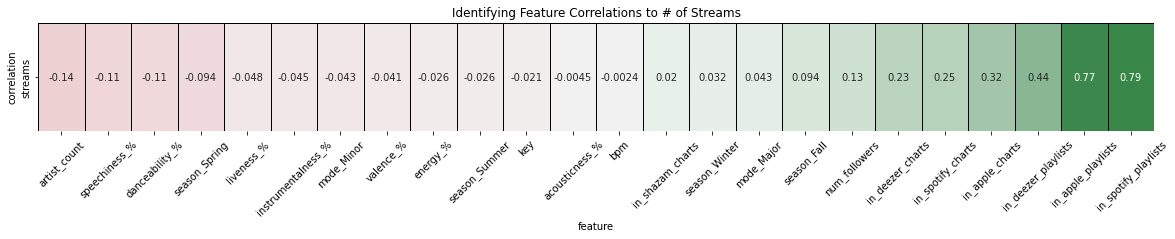

In [436]:
numeric_data = data.select_dtypes(include='number')
correlation_with_streams = numeric_data.corr()['streams'].drop('streams').sort_values(ascending=True)

heatmap_data = pd.DataFrame(correlation_with_streams).T

cmap = sns.diverging_palette(10, 133, as_cmap=True)

plt.figure(figsize=(20, 2))
sns.heatmap(heatmap_data, annot=True, cmap=cmap, center=0,
            cbar=False, linewidths=1, linecolor='black')

plt.xticks(rotation=45)
plt.xlabel('feature')
plt.ylabel('correlation')
plt.title('Identifying Feature Correlations to # of Streams')
plt.show()

From the above distributions, scatterplots, and correlations, we came to the following observations:
* Most of the distributions for chart locations are similar across the different platforms
* For the scatterplots, there is a strong positive correlation between **in_apple_playlists** and **streams**
* There does not seem to be a strong relationship between instrinsic song features and streams. More specifically, features such as danceability, valence, acousticness, and others seem to have a rather arbitrary relationship.
* When looking at the feature correlations to # of streams, we can see that **in_spotify_playlists** and **in_apple_playlists** seem to have the highest correlations.
* As discovered from the scatterplots, bpm, acousticness, key, energy, and other intrinsic metrics have correlations that are essentially 0. Thus, using these features to predict streams is highly unlikely.


The provided bar chart represents the correlation of various features with the number of streams for music tracks. It shows both negative and positive correlations ranging from -0.14 to 0.79.

* On the left side of the chart are features with negative correlations, indicating that as these feature values increase, the number of streams tends to decrease. The most negatively correlated feature is 'artist_count', followed by 'speechiness_%', 'danceability_%', and 'key'. The negative values suggest that songs with excessive lyricism (from speechiness) have fewer streams.

* Moving towards the right, the features shift from negative to positive correlations. Features like 'num_followers' show very slight positive correlations, suggesting a weak relationship to streaming numbers.

* The remaining features had none to very weak negative correlations to the number of streams, indicating that these features are likely unhelpful in predicting streams.

<hr style="border:0.25px solid gray">

## Predictive Modeling

#### Simple Linear Regression (Spotify Playlist Ranking and Num. Streams)

Let's first start with a simple linear regression. We know that there is a high correlation between location in Spotify playlists and number of streams. Let's take a look at the scatterplot between the two variables.

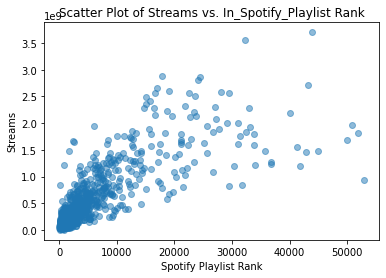

In [437]:
x_data = data['in_spotify_playlists']
y_data = data['streams']
x_data = x_data.values.reshape(-1,1)
y_data = y_data.values.reshape(-1,1)
plt.scatter(x_data, y_data, alpha=0.5)
plt.title('Scatter Plot of Streams vs. In_Spotify_Playlist Rank')
plt.xlabel('Spotify Playlist Rank')
plt.ylabel('Streams')
plt.show()

As we can see, there is a clear relationship between the two variables. Let's fit a simple linear regression model to predict streams from location in spotify playlists.

In [438]:
model = LinearRegression()
model.fit(x_data, y_data)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {model.score(x_data, y_data)}")

Slope: [56662.88773555]
Intercept: [2.19345061e+08]
R-squared value: 0.6238190443560807


This computes the slope, intercept, and R2 values. As we can see above, we received a slope of 56662.8877. Thus, when predicting the number of streams a song has, an increase in rank on Spotify playlists will lead to an increase in almost **60,000** streams. We also received an R2 value of 0.62, indicating a moderate correlation.

However, there is something to note here. This does not necessarily draw a causation, or even a strong correlation. This is because a song may be on these playlists _because_ they have a high number of streams. **Let's look at another regression between the number of followers and number of streams.**

#### Regression between Number of Followers and Streams

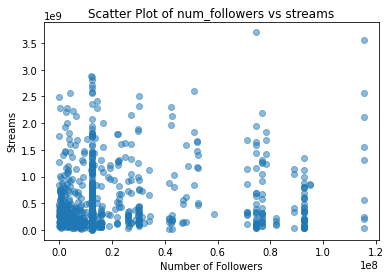

In [411]:
new_x_data = data['num_followers']
new_y_data = data['streams']
new_x_data = new_x_data.values.reshape(-1,1)
new_y_data = new_y_data.values.reshape(-1,1)
plt.scatter(new_x_data, new_y_data, alpha=0.5)
plt.title('Scatter Plot of num_followers vs streams')
plt.xlabel('Number of Followers')
plt.ylabel('Streams')
plt.show()

In [412]:
model = LinearRegression()
model.fit(new_x_data, new_y_data)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {model.score(new_x_data, new_y_data)}")

Slope: [2.94725856]
Intercept: [4.52054339e+08]
R-squared value: 0.01740674438266243


Once again, this computes the slope and intercept values. As we can see above, we received a slope of 2.947. Thus, when predicting the number of streams a song has, an additional follower for the artist means that on average, it will have almost 3 additional streams. This intuitively makes sense: more popular artists are likely to have songs that have more streams. However, this model does not fit very well. It only has a R2 value of 0.017, indicating a very weak correlation. In fact, these values could be very weak and the slope could simply be due to variance or represent an arbitrary value. We can also see with the graph itself - there does not seem to be a linear correlation at all between these two features. Let's proceed with a linear regression with all of our features.

#### Linear Regression with all features

To start, let's establish the feature set (X) and our label (number of streams):

In [439]:
X = data.drop('streams', axis=1)
y = data['streams']

#### Linear Regression
First, let's start simple and evaluate a linear regression model to predict streams.

Test Set R^2:  0.7619383473715718


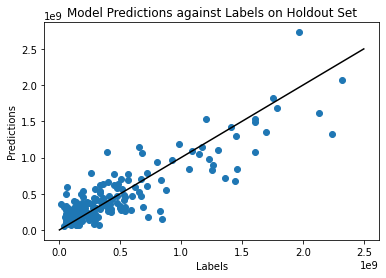

In [440]:
model = LinearRegression()

# Define train-test Split for fitting model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Test Set R^2: ', r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('Labels')
plt.ylabel('Predictions')
plt.title('Model Predictions against Labels on Holdout Set')

# Plot y=x line to assess r^2
reg_line_x = np.linspace(-10, 2.5e9, 100)
reg_line_y = reg_line_x
plt.plot(reg_line_x, reg_line_y, color='black', label='Regression Line')
plt.show()

There are downsides to doing a single hold-out test set (randomness in data split, variance in performance, etc). Let's carry out **5-fold cross-validation** to determine how our model does over multiple trials.

In [441]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

results_df = pd.DataFrame({
    'R^2 (Fold 1)': [scores[0]],
    'R^2 (Fold 2)': [scores[1]],
    'R^2 (Fold 3)': [scores[2]],
    'R^2 (Fold 4)': [scores[3]],
    'R^2 (Fold 5)': [scores[4]],
    'R^2 (Average)': [np.mean(scores)],
})

results_df

,R^2 (Fold 1),R^2 (Fold 2),R^2 (Fold 3),R^2 (Fold 4),R^2 (Fold 5),R^2 (Average)
0,0.688683,0.752291,0.638864,0.662911,0.326319,0.613813


#### Analysis

* As we can see, we received R2 values of around **0.61**. This implies that approximately 61% of the variability in the target variable is captured by the model.
* The line *y=x* is the ideal line. This means that the values that our model is predicting is equal to the actual value. We see that the datapoints are tightly crowded around the line at the left side of the graph, indicating solid fit. However, near the end, we can see that there are greater deviations from the line.

#### Regression Trees
Now, let's look at another type of model called regression trees. Regression Trees are intuitive, easy to interpret, can handle non-linear relationships, and do not require feature scaling or centering. However, they can also easily overfit the data, especially with many branches or depth, and they might not capture complex relationships as well as other regression methods. Here we'll nested cross validation to accurately assess model performance while adjusting for optimal parameters.

In [442]:
model = DecisionTreeRegressor()

# Set up the parameter options grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

scores = cross_val_score(grid_search, X, y, cv=5, scoring='r2')
results_df = pd.DataFrame({
    'R^2 (Fold 1)': [scores[0]],
    'R^2 (Fold 2)': [scores[1]],
    'R^2 (Fold 3)': [scores[2]],
    'R^2 (Fold 4)': [scores[3]],
    'R^2 (Fold 5)': [scores[4]],
    'R^2 (Average)': [np.mean(scores)],
})

results_df

,R^2 (Fold 1),R^2 (Fold 2),R^2 (Fold 3),R^2 (Fold 4),R^2 (Fold 5),R^2 (Average)
0,0.654403,0.799179,0.579231,0.609136,0.000444,0.528479


#### Analysis

* The average R2 value across all folds is 0.53. Once again, this suggests that, on average, 53% of the variance in the number of streams can be explained by the model.
* This performed slightly worse than the linear regression model.
* It is very important that we set up and use a param_grid. As discussed in class, a decision tree regressor can overfit if we use arbitrary values for hyper-parameters such as **max_depth**, **min_samples_split**, and **min_samples_leaf**.
* The 5th fold performed signficantly worse than any of the others. Once again, this is why it is important to use cross-validation with multiple folds.

#### Random Forests
Now, let's try out random forests. They're known to be robust against overfitting, can handle non-linear data and a mix of numerical and categorical features. However, some downsides are computationally intensive, less interpretable than single decision trees, and could suffer in high-dimensionality. First, we'll use the holdout method to evalute the base model and check for feature importance. T

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Test Set R^2:  0.828415883008188


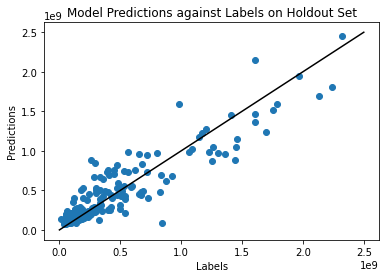

In [443]:
model = RandomForestRegressor()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.get_params())
print('Test Set R^2: ', r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('Labels')
plt.ylabel('Predictions')
plt.title('Model Predictions against Labels on Holdout Set')

# Plot y=x line to assess r^2
reg_line_x = np.linspace(-10, 2.5e9, 100)  # You can adjust the range and number of points as needed
reg_line_y = reg_line_x
plt.plot(reg_line_x, reg_line_y, color='black', label='Regression Line')
plt.show()

Now let's take a look at which features the model found most important:

/var/folders/wm/kqnc_lrd3tg6d8xd5911h_vw0000gn/T/ipykernel_47687/525670430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=df_importances, palette=colors)
/var/folders/wm/kqnc_lrd3tg6d8xd5911h_vw0000gn/T/ipykernel_47687/525670430.py:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='Importance', y='Feature', data=df_importances, palette=colors)
/var/folders/wm/kqnc_lrd3tg6d8xd5911h_vw0000gn/T/ipykernel_47687/525670430.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importances, palette=colors[:

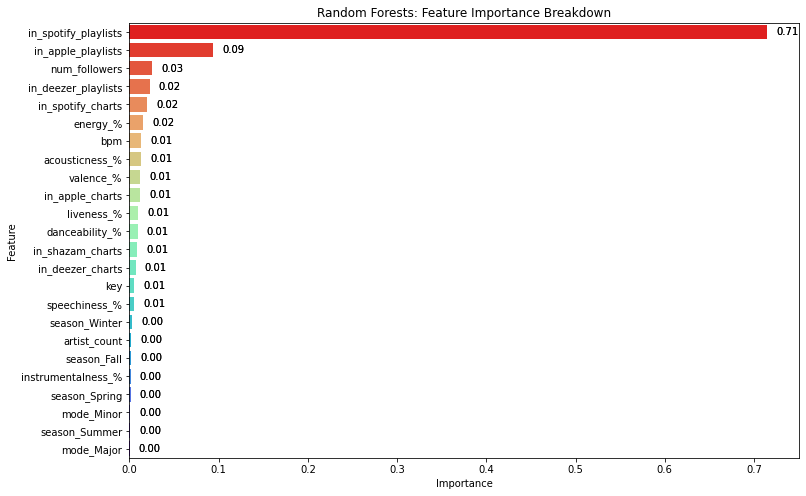

In [444]:
feature_importances = model.feature_importances_

df_importances = pd.DataFrame({'Feature': X.keys(), 'Importance': feature_importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))

num_bars = df_importances.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

ax = sns.barplot(x='Importance', y='Feature', data=df_importances, palette=colors)
sns.barplot(x='Importance', y='Feature', data=df_importances, palette=colors[::-1])

plt.title('Random Forests: Feature Importance Breakdown')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}'.format(width),
            ha = 'left',
            va = 'center')

plt.show()

#### Analysis


* As we can see, the model was able to recognize **in_spotify_playlists** and **in_apple_playlists** as the most important features to split on **(0.71 and 0.09)**, respectively.
* This makes sense; songs that are on these top playlists are likely to have more streams. What is surprising, however, is the disparity of importance between spotify and apple. Although our dataset uses Spotify data, we thought that they would have relatively equal importance deemed by the random forest.
* We were quite surprised about the fact that artist_count was not an important feature deemed by the random forest. Going into this project, we assumed that song with more artists would inherently have more streams because of more publicity, exposure to more fans, etc.
* Once again, many of the intrinsic features such as valence, energy, bpm, liveness, and others had very low importance.

Now, let's leverage nested cross-validation to assess the model performance and tune paramaters. For the sake of runtime, we limited it to 3-fold CV for this model.

In [445]:
param_grid = {
    'n_estimators': [100,500],
    'max_features': ['sqrt','log2'],
    'max_depth': [None, 10, 25],
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2')

scores = cross_val_score(grid_search, X, y, cv=3, scoring='r2')
results_df = pd.DataFrame({
    'R^2 (Fold 1)': [scores[0]],
    'R^2 (Fold 2)': [scores[1]],
    'R^2 (Fold 3)': [scores[2]],
    'R^2 (Average)': [np.mean(scores)],
})

results_df

,R^2 (Fold 1),R^2 (Fold 2),R^2 (Fold 3),R^2 (Average)
0,0.688353,0.732784,0.738777,0.719971


#### Analysis

* The variation in R2 values was very low here, indicating that the R2 value is precise. Once again, an R2 value of 0.72 means that approximately 72% of the variance in the number of streams can be explained by all of the labels that we passed in. 
* The most impactful features determined by our model were the location of the songs on the Spotify and Apple playlists. It was also interesting to note that it was not as important as where these songs landed on the top charts, but rather playlists.
* For aspiring artists, this means that focusing on getting your songs added to user playlists is more important than being added to the "USA Top 100" or similar Spotify charts. This makes intuitive sense: people like to stream the songs that are in their own playlists, not arbitrary playlists created by Spotify.

#### Support Vector Regression (SVR)

Now, let's attempt using support vector regression, or SVR, for this prediction task. SVR is effective in high-dimensional spaces and is robust against overfitting, but may suffer the need for extensive parameter tuning. Once again, we'll employ nested cross-validation and appropriate scaling. We opt for 3-fold CV due to runtime considerations.

In [446]:
param_grid = {
    'svm__C': [0.5e9, 1e9, 2e9],
    'svm__epsilon': [3, 5, 7],
     'svm__gamma': [0.1, 1, 5],
     'svm__kernel': ['rbf', 'sigmoid']
}

svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svm', SVR())])

# Set up GridSearchCV
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=3, scoring='r2')

scores = cross_val_score(grid_search, X, y, cv=3, scoring='r2')
results_df = pd.DataFrame({
    'R^2 (Fold 1)': [scores[0]],
    'R^2 (Fold 2)': [scores[1]],
    'R^2 (Fold 3)': [scores[2]],
    'R^2 (Average)': [np.mean(scores)],
})

results_df

,R^2 (Fold 1),R^2 (Fold 2),R^2 (Fold 3),R^2 (Average)
0,0.251855,0.571364,0.545883,0.456367


#### Analysis

* The R2 value of 0.45 indicates that the SVR model is capturing some but not of the variability in the data (there is lots of room for improvement.
* Usually, SVRs require extensive hyper-parameter tuning in order to receive good results. Thus, we may need to conduct additional tuning in order to receive better results. This could include using different kernel functions, other epsilon/gamma values, and more.
* We ensured that the data was scaled in this case by passing the StandardScaler objet into the SVM pipeline.

#### Additional Models
For the sake of curiousity, we were interested in taking a hollistic view of all sklearn models and their performance in predicting number of streams.

In [356]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

regressor = LazyRegressor(verbose=0, ignore_warnings=True)

models, predictions = regressor.fit(x_train, x_test, y_train, y_test)

models

NameError: name 'LazyRegressor' is not defined

In [357]:
models

NameError: name 'models' is not defined

In [272]:
# discuss results here + results could be even further improved through grid search

#### Mini-Experiment: Removing Charts & Ranking Features

So far, we've utilized the charts and playlist rankings features, which inform a song's performance on Spotify, Apple Music, and Deezer. Logically, it follows that a song that charts or is on a high number of user-playlists will have a high number of streams. Suppose an artist creates a totally new, unreleased song and doesn't have that information yet and is looking to predict the number of streams their song will get. To simulate this scenario, let's re-run the exhaustive list of our models after dropping those features and compare the performance gain/dropoff.

In [295]:
# Drop specified columns
cols_to_drop = ['in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'in_spotify_playlists', 'in_spotify_charts']
X_modified = X.drop(columns=cols_to_drop)

x_train, x_test, y_train, y_test = train_test_split(X_modified, y, test_size=0.2,random_state=42)

regressor = LazyRegressor(verbose=0, ignore_warnings=True)

models, predictions = regressor.fit(x_train, x_test, y_train, y_test)

models

 98%|██████████████████████████████████████████████████████████████████████████████████████████████▋  | 41/42 [00:13<00:00,  2.03it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 761, number of used features: 13
[LightGBM] [Info] Start training from score 524738267.164258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.33,0.38,388238117.24,0.21
GradientBoostingRegressor,0.29,0.35,400081049.29,0.17
LGBMRegressor,0.28,0.33,404188673.51,0.27
HistGradientBoostingRegressor,0.27,0.33,405177335.68,1.51
RandomForestRegressor,0.22,0.28,420664256.28,0.39
XGBRegressor,0.21,0.27,422689769.33,0.34
BaggingRegressor,0.18,0.25,429800010.95,0.03
ElasticNet,-0.04,0.04,483730155.18,0.04
OrthogonalMatchingPursuitCV,-0.04,0.04,484072608.67,0.02


In [ ]:
## Discuss results and huge dropoff in performance + why

#### Mini-Experiment: Classification rather than Regression 

Consider an artist that didn't want to get an estimate on number of streams, but just a general sense of whether the track will be a hit or not. For our purposes, we'll consider a hit to be any track with at least **1 billion** streams on Spotify. First, we'll create the class label, try several different classifier models, and evaluate performance in comparision to regression. For sake of simplicity, we'll use the holdout method for accuracy evaluation.

**Note**: Hit = 1, Not-Hit = 0

In [41]:
# Add class label
data['hit'] = (data['streams'] > 1e9).astype(int)

# Drop class label and 'streams' (basically the answer)
X = data.drop(['hit', 'streams'], axis=1)
y = data['hit']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

models

 97%|█████████████████████████████████████████████████████████████████████████████████████████████▋   | 28/29 [00:00<00:00, 25.07it/s]

[LightGBM] [Info] Number of positive: 124, number of negative: 637
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 761, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162943 -> initscore=-1.636488
[LightGBM] [Info] Start training from score -1.636488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.80it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.89,0.88,0.88,0.90,0.01
SGDClassifier,0.93,0.87,0.87,0.93,0.01
Perceptron,0.93,0.87,0.87,0.93,0.02
GaussianNB,0.91,0.87,0.87,0.91,0.00
LinearSVC,0.94,0.86,0.86,0.94,0.03
LogisticRegression,0.94,0.86,0.86,0.94,0.01
PassiveAggressiveClassifier,0.92,0.86,0.86,0.92,0.02
QuadraticDiscriminantAnalysis,0.91,0.86,0.86,0.91,0.02
NearestCentroid,0.89,0.85,0.85,0.90,0.02


**Note**: The above code segment will display a long list of intermediate state, simply run the following cell after completion to view just model results.

In [38]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.89,0.88,0.88,0.90,0.01
SGDClassifier,0.93,0.87,0.87,0.93,0.01
Perceptron,0.93,0.87,0.87,0.93,0.01
GaussianNB,0.91,0.87,0.87,0.91,0.00
LinearSVC,0.94,0.86,0.86,0.94,0.03
LogisticRegression,0.94,0.86,0.86,0.94,0.01
PassiveAggressiveClassifier,0.92,0.86,0.86,0.92,0.02
QuadraticDiscriminantAnalysis,0.91,0.86,0.86,0.91,0.01
NearestCentroid,0.89,0.85,0.85,0.90,0.02


In [40]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.89,0.88,0.88,0.90,0.01
SGDClassifier,0.93,0.87,0.87,0.93,0.01
Perceptron,0.93,0.87,0.87,0.93,0.01
GaussianNB,0.91,0.87,0.87,0.91,0.00
LinearSVC,0.94,0.86,0.86,0.94,0.03
LogisticRegression,0.94,0.86,0.86,0.94,0.02
PassiveAggressiveClassifier,0.92,0.86,0.86,0.92,0.01
QuadraticDiscriminantAnalysis,0.91,0.86,0.86,0.91,0.02
NearestCentroid,0.89,0.85,0.85,0.90,0.02


In [ ]:
## Discuss classification results, compare against regression, which is better for which use case, etc

## Discussion

This study aimed to explore the effectiveness of regression models, specifically linear regression, regression trees, random forest, and Support Vector Regression (SVR), in predicting the number of hits a song would receive on Spotify. 

Our findings indicate a couple of implications for artists. The inability to effectively predict song virality effectively means that **artists cannot tailor their songs based on specific intrinsic factors**. This challenges the prevailing notion that following certain musical trends or incorporating specific features can guarantee success on streaming platforms. However, given our research, artists should know that it is **important to get their songs on user playlists, especially on the Spotify platform**. This is more important than simply getting their songs on the top charts, as users tend to listen to the music from playlists, recommendations from friends, etc.


To understand the reasons behind the models' performance, we examined the feature correlations with the number of streams. Our dataset included various musical and contextual features such as energy, danceability, valence, artist popularity, and more. Surprisingly, we found no strong correlations between any of these features and the target variable—number of streams. We found a high correlation with features like Spotify playlists, Apple Charts and Deezer.

